---
# Zadaća 5
##### Rok za predaju: 7. travnja, 2021. u 23:59h
##### Način predaje: Teams->Strojno učenje->Assignment, predajete.ipynb datoteka (ili više datoteki u .zip) ili link na Google colab 

### Ime i prezime: Borna Gajić
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, scale, LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import SGDClassifier, LogisticRegression, LogisticRegressionCV

## Zadatak 1 (10)
Učitajte podatke `X_train_1.csv` i `y_train_1.csv` i `X_test_1.csv` i `y_test_1.csv`. Podatke trebamo opisati model funkcijom $h_{\theta}(x) = \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3 + \theta_4 x^4 + \theta_5 x^5$. <br> Kako bi pronašli odgovarajuće parametre koristite gradijentnu metodu. Zbog većeg broja značajki uvest ćemo regularizaciju. 

- Učitajte i prikažite podatke. Napravite odgovarajuću matricu dizajna. 
- Pokretat ćete gradijentnu metodu s različitim izborima parametra $\lambda$. Odaberite $\lambda = 0,10,20,\cdots, 200$. Za svaki izbor $\lambda$
    - natrenirajte model
    - izračunajte pogrešku na trening skupu
    - izračunajte pogrešku na test skupu
- Nacrtajte graf ovisnosti pogreške regularizacijskom koeficijentu $\lambda$ na trening skupu o i ovisnosti pogreškeo regularizacijskom koeficijentu $\lambda$ na testnom skupu. 
- Što možete zaključiti? Koliki $\lambda$ biste odabrali? Obrazložite. 

Gradijentna metoda s regularizacijom

In [2]:
def gradient_method(X, Y, lambda_ = 1.0, alpha = 0.001, numIter = None): 
    m, n = X.shape
    theta =  np.zeros((n, 1))
    Y = Y.reshape(-1,1)
    cost = np.zeros(numIter) 
    
    for i in range(numIter):
        XThetaY = X.dot(theta)-Y 
        gradJ = (X.T.dot(XThetaY))/m 
        
        theta[0] = theta[0]- alpha*gradJ[0]
        theta[1:] = theta[1:]*(1-alpha*lambda_/m) - alpha*gradJ[1:]
        
        cost[i] = ((XThetaY.T).dot(XThetaY) +lambda_*np.linalg.norm(theta[1:],2)**2)/(2*m)
        
    return cost, theta

In [84]:
def plotDecisionBoundary(X,y,theta,s):
    # X,y podaci
    # theta parametar
    # stupanj polinoma u model funkciji h_theta(x)
    plt.scatter(X, y)
    xmin = X.min()
    xmax = X.max()
    xx = np.arange(xmin,xmax,0.1)
    XX = np.ones([xx.shape[0],s+1])
    for i in range(s):
        XX[:,i+1] = xx**(i+1)
    yy = XX.dot(theta)
    plt.plot(xx,yy,'r')
    plt.show()

In [85]:
def plot_boundary(theta, X, y, grid_step=.01, poly_featurizer=None):
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, grid_step),np.arange(y_min, y_max, grid_step))
    
    #Z = clf.predict(poly_featurizer.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z=(np.sign(poly_featurizer.transform(np.c_[xx.ravel(), yy.ravel()]).dot(theta))+1)/2
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    
    X_p = np.array([X[i] for i in range(X.shape[0]) if y[i]==1])
    X_n = np.array([X[i] for i in range(X.shape[0]) if y[i]==-1])
    plt.scatter(X_p[:,0],X_p[:,1], marker='o', label='')
    plt.scatter(X_n[:,0],X_n[:,1],marker='x', label='')

Učitavanje skupa podataka

In [170]:
X_train_1 = pd.read_csv('./Podaci/X_train_1.csv').to_numpy()
y_train_1 = pd.read_csv('./Podaci/y_train_1.csv').to_numpy()

X_test_1 = pd.read_csv('./Podaci/X_test_1.csv').to_numpy()
y_test_1 = pd.read_csv('./Podaci/y_test_1.csv').to_numpy()

X_train_1_1 = np.c_[np.ones((X_train_1.shape[0], 1)), X_train_1]
X_test_1_1 = np.c_[np.ones((X_train_1.shape[0], 1)), X_train_1]

Prikaz podataka

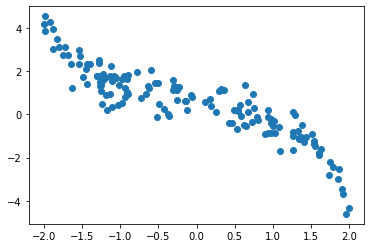

In [171]:
plt.scatter(X_train_1, y_train_1)
plt.show()

Dodavanje featura

In [172]:
poly = PolynomialFeatures(5)

X_train_1_poly = poly.fit_transform(X_train_1)
X_test_1_poly = poly.fit_transform(X_test_1)

Treniranje modela

In [179]:
error_list = []
for l in range(0, 210, 10):
    cost, theta = gradient_method(X_train_1_poly, y_train_1, lambda_ = l, numIter=1000)
    
    error_train = mean_squared_error(y_train_1, X_train_1_poly.dot(theta))
    error_test = mean_squared_error(y_test_1, X_test_1_poly.dot(theta))
    error_list.append([error_train, error_test, l])
    
    print("Pogreška na trening skupu, lambda = {0}: {1}".format(l, error_train))
    print("Pogreška na testnom skupu, lambda = {0}: {1}".format(l, error_test))
    print("---------------------------------------------------------")
    
error_list = np.array(error_list)

Pogreška na trening skupu, lambda = 0: 0.34491379227023683
Pogreška na testnom skupu, lambda = 0: 0.31499394498634964
---------------------------------------------------------
Pogreška na trening skupu, lambda = 10: 0.3482099181313563
Pogreška na testnom skupu, lambda = 10: 0.31690525191274765
---------------------------------------------------------
Pogreška na trening skupu, lambda = 20: 0.3515181172643256
Pogreška na testnom skupu, lambda = 20: 0.3188932171545698
---------------------------------------------------------
Pogreška na trening skupu, lambda = 30: 0.35482756849756364
Pogreška na testnom skupu, lambda = 30: 0.32094361235961044
---------------------------------------------------------
Pogreška na trening skupu, lambda = 40: 0.35812884384151383
Pogreška na testnom skupu, lambda = 40: 0.3230438002191105
---------------------------------------------------------
Pogreška na trening skupu, lambda = 50: 0.36141375993646024
Pogreška na testnom skupu, lambda = 50: 0.32518257341575

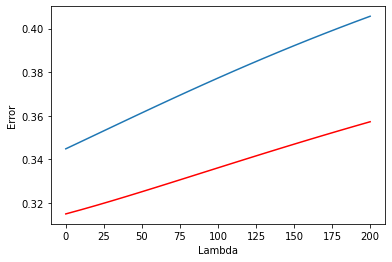

In [90]:
plt.plot(error_list[:, 2], error_list[:, 0])
plt.plot(error_list[:, 2], error_list[:, 1], c = 'r')
plt.xlabel("Lambda")
plt.ylabel("Error")
plt.show()

Za lambdu bi odabrao 0 jer je najoptimalniji odabir. Greška predikcije raste sa povečanjem parametra lambda.

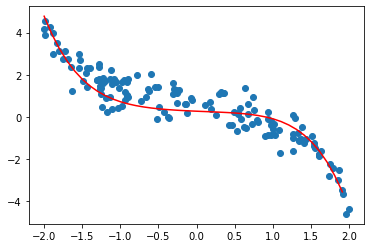

In [180]:
plotDecisionBoundary(X_train_1, y_train_1, theta, 5)

## Zadatak 2 (10)

Neka je zadan klasifikacijski problem na podacim $X \in \mathbb{R}^{m\times }$ s pripadnim oznakama $y\in \mathbb{R}^m$, gdje je svaki $y_i \in \{ 0,1\}$. <br>
Raspišite kako izgleda regularizirana funkcija $J(\theta)$ za logističku regresiju, njen gradijent te korak ažuriranja. 

---

Učitajte i prikažite podatke `X_train_2` i `y_train_2`. <br>

<br>
Za model funkciju uzimamo polinom $6$-tog stupnja, koristeći sklearn.PolynomialFeatures transformirajte podatke. <br>

Modificirajte gradijentnu metodu (s regularizacijom) tako da iterirate dokle god je razlika u pogreški manja od $10e^{-8}$. Stopu učenja fiksirajte na $0.001$. Natrenirajte vaše podatke s različitim izborom $\lambda = 0, 1, 100$. Za svaki slučaj treniranje 
- nacrajte pripadni graf koji sadrži podatke i granicu, ispišite 
- ispišite točnost (accuracy)
- ispište broj iteracija koji se izvrtio

Što možete zaključiti? 

Gradijentna metoda logističke regresije s regularizacijom

In [181]:
def h(z):
    return (1.0 / (1.0 + np.exp(-z)))

def predict(X_poly, theta):
    return np.array([1 if i>=0.5 else 0 for i in h(X_poly.dot(theta))])

def Loss(X,y,theta, lam):
    m = X.shape[0]
    xt = X @ theta
    y = y.reshape(-1,1)
    err = xt-y
    hx = h(xt)
    return -(1/m)*np.sum((y*np.log(hx)+(1-y)*np.log(1-hx))) + (lam/(2*m))*theta[1:].T.dot(theta[1:])

def gradientMethodLogRegularized(X, Y, alpha = 0.001, lam = None, numIter = None, tol = 10**(-4)): 
    m, n = X.shape
    theta =  np.zeros((n, 1))
    Y = Y.reshape(-1,1)
    error_diff = 0
    iter_counter = 0
    j=0
    while True:        
        XThetaY =  h(X @ theta) -Y
        gradJ = (1/m)*((X.T) @ XThetaY)
        theta[0] = theta[0] - alpha*gradJ[0]
        theta[1:] = theta[1:]*(1-alpha*(lam/m)) - alpha*gradJ[1:]
        
        iter_counter += 1
        if numIter != None:
            if numIter == 0: break
            else: numIter -= 1
        else:
            if iter_counter == 1: error_diff = Loss(X, Y, theta, lam)
            else:
                if np.abs(np.abs(Loss(X, Y, theta, lam)) - np.abs(error_diff)) <= tol: break
                else: error_diff = Loss(X, Y, theta, lam)
            
    return theta, iter_counter

Učitavanje podataka

In [143]:
X_train_2 = pd.read_csv('./Podaci/X_train_2.csv').to_numpy()
y_train_2 = pd.read_csv('./Podaci/y_train_2.csv').to_numpy()

poly = PolynomialFeatures(6)
X_train_2_poly = poly.fit_transform(X_train_2)

Treniranje modela

In [164]:
theta_list = []
iter_list = []

for l in [0, 1, 100]:
    theta, iters = gradientMethodLogRegularized(X_train_2_poly, y_train_2, lam = l)
    theta_list.append(theta)
    iter_list.append(iters)
    
    print("Hiperparametri sa lambdom od {0}:\n{1}\n".format(l, theta_list[-1].ravel()))
theta_list = np.array(theta_list)

Hiperparametri sa lambdom od 0:
[-1.1899581   0.25254996  0.14468609 -0.04617974  0.06265944  0.05892628
  0.19782943  0.00953087  0.05605735  0.08836262  0.07441445  0.02615936
  0.06917233  0.05420753  0.15544862  0.18334822  0.00595508  0.01233659
  0.00648408  0.02921922  0.05891896  0.11728381  0.00608744  0.04208473
  0.02292077  0.04743291  0.03987313  0.17524368]

Hiperparametri sa lambdom od 1:
[-1.16465734  0.24328258  0.13934964 -0.04631054  0.05974422  0.05469707
  0.19043069  0.0093193   0.05403275  0.08517539  0.0697801   0.02497346
  0.06574526  0.05172188  0.14768862  0.1763447   0.00577256  0.0119854
  0.00634348  0.02816306  0.0568551   0.11113702  0.00581712  0.04005432
  0.02188065  0.0451736   0.03804849  0.16688901]

Hiperparametri sa lambdom od 100:
[-0.82752359  0.07705514  0.04353345 -0.01471794  0.01663209  0.01442991
  0.05964799  0.00365391  0.01707298  0.02715292  0.01808075  0.00694652
  0.01778479  0.01435054  0.04066752  0.05441863  0.00196541  0.0043699

Grafički prikaz

### $\lambda = 0$

accuracy =  0.0
Iterations:  3335


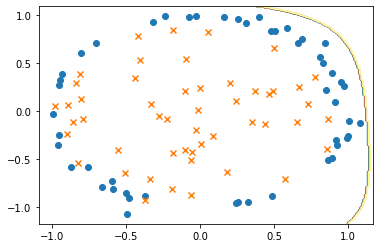

In [165]:
plot_boundary(theta_list[0], X_train_2, y_train_2, poly_featurizer = poly)

y_pred = predict(X_train_2_poly, theta_list[0])
print('accuracy = ' , accuracy_score(y_train_2, y_pred))
print('Iterations: ', iter_list[0])

### $\lambda = 1$

accuracy =  0.0
Iterations:  3242


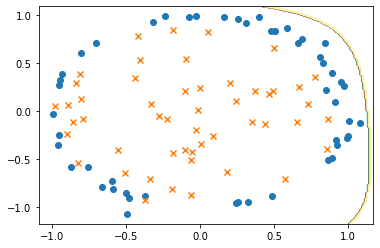

In [166]:
plot_boundary(theta_list[1], X_train_2, y_train_2, poly_featurizer = poly)

y_pred = predict(X_train_2_poly, theta_list[1])
print('accuracy = ' , accuracy_score(y_train_2, y_pred))
print('Iterations: ', iter_list[1])

### $\lambda = 100$

accuracy =  0.0
Iterations:  2098


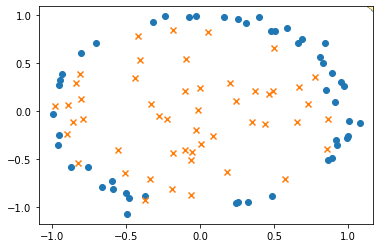

In [167]:
plot_boundary(theta_list[2], X_train_2, y_train_2, poly_featurizer = poly)

y_pred = predict(X_train_2_poly, theta_list[2])
print('accuracy = ' , accuracy_score(y_train_2, y_pred))
print('Iterations: ', iter_list[2])

## Zadatak 3 (15)
U prošloj zadaći dobili ste skup podataka *mobile_price*. Podaci su sadržavali različite speficikacije mobitela, a zadatak je bio prema tim spefifikacijama svrstati mobitel u neki od cjenovnih rangova. <br>
Sada kada smo se upoznali s pojmom regularizacije, možemo ponoviti taj zadatak, ovaj puta sa regulariziranom softmax regresijom. <br>

1. Modificirajte implementaciju gradijetne metode s obzirom na dodani regularizacijski izraz.
2. Provedite postupak učenja modela na podacima. 
3. Testirajte model tako da ispišete neke od metrika poput točnosti.
4. Ispišite naučene parametre $\theta$ i usporedite ih sa parametrima koje ste dobili u prošloj zadaći kada niste koristili regularizaciju. Koja je razlika?

Modificirana Softmax regresija:

In [192]:
class Softmax:
    def __init__(self, k, lam, intercept = True):
        self.k = k
        self.lam = lam
        self.theta = None
        self.cost_iterations = None
        self.intercept = intercept
    
    def h(self, z):
        return np.exp(z)/ np.sum(np.exp(z),axis=1).reshape(-1,1)
    
    def indicator_function(self, y):
        """
        y - vector of targets, shape is (m,1) or (m,), each element takes value from {0,1,...,k-1}
        k - single integer, number of classes
        return matrix shaped (m,k), element on [i,j] position is 1 if ith datasample is jth class, and 0 otherwise
        """
        y = y.reshape(-1,1)
        all_classes = np.arange(0,self.k)
        return ((y[:]==all_classes)*1).reshape(-1,self.k)
    
    def cost_function(self, X, y, lam):
        m = X.shape[0]
        thetaX = X.dot(self.theta) # theta^T * X 
        hx = self.h(thetaX) # Primijenjujemo model funkciju h_theta(x) = exp(x)/suma(...)
        I = self.indicator_function(y)
        gradijent= (-1.0)*np.dot(X.T,I-hx)
        
        regularisation = 0
        for i in range(X.shape[1]):
            for j in range(self.k):
                regularisation += self.theta[i, j]
        regularisation *= self.lam
        
        gradijent += regularisation
        
        cost = -1.0 * np.sum(np.sum(I*np.log(self.h(thetaX)),axis=1))
        return cost, gradijent
    
    def plot_cost(self):
        plt.plot(np.arange(self.cost_iterations.shape[0]), self.cost_iterations, color='orchid')
        plt.title('Promjena funkcije pogreške kroz iteracije')
        plt.show()
        
    def predict_sm(self, X, Y):
        if self.intercept:
            X = np.column_stack([np.ones([X.shape[0]]), X])
        return np.argmax(self.h(X.dot(self.theta)),axis=1)
        
    
    def fit(self, X, Y, alpha = 0.001, numIter=200):
        m = X.shape[0]
        if self.intercept:
            X = np.column_stack([np.ones([m]), X])
    
        Y = Y.reshape(-1,1)
        self.theta =  np.zeros((X.shape[1],self.k))
        self.cost_iterations = np.zeros(numIter)
        for i in range(numIter):
            c, grad = self.cost_function(X, Y, self.lam)
            self.theta = self.theta - alpha*grad
            self.cost_iterations[i]=c

Podaci o mobitelima

In [203]:
mobiteli_train_data = pd.read_csv('./Podaci/Mobiteli/train.csv')

mobiteli_train = mobiteli_train_data.to_numpy()
mobiteli_test = pd.read_csv('./Podaci/Mobiteli/test.csv').to_numpy()

X_mob = scale(mobiteli_train[:, : -1])
y_mob = mobiteli_train[:, -1].reshape(-1, 1)

X_mob_test = scale(mobiteli_test[:, :-1])
y_mob_test = mobiteli_test[:, -1].reshape(-1, 1)

CSV prikaz podataka

In [188]:
mobiteli_train_data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


Treniranje modela

In [199]:
model = Softmax(k = 4, lam = 0.001)
model.fit(X_mob, y_mob)

Hiperparametri za model

In [200]:
print(model.theta)

[[-2.51160725e+00  2.42149753e+00  2.42873220e+00 -2.33862248e+00]
 [-2.16716173e+00 -7.36166895e-01  7.04518096e-01  2.19881053e+00]
 [ 9.30889133e-03 -1.28593006e-02 -6.93934817e-04  4.24434414e-03]
 [ 8.24559793e-02 -2.20757552e-02 -2.99023224e-02 -3.04779017e-02]
 [ 7.29989305e-02  6.69900050e-03 -7.69101693e-02 -2.78776175e-03]
 [-6.23412442e-02  3.31241750e-03  4.69602004e-02  1.20686263e-02]
 [-2.12026561e-02  2.98251936e-02 -7.05596956e-02  6.19371581e-02]
 [-1.24473524e-01 -4.63594527e-02 -2.12151750e-02  1.92048152e-01]
 [ 1.08773866e-02  9.57239530e-02 -5.41733624e-02 -5.24279772e-02]
 [ 2.70219629e-01  1.37300046e-01  6.62219842e-03 -4.14141874e-01]
 [-9.89744408e-03 -1.09487323e-01  4.34619591e-02  7.59228080e-02]
 [-1.70240105e-03 -3.07110553e-02 -3.37276397e-03  3.57862204e-02]
 [-1.27178583e+00 -3.65705828e-01  3.95484438e-01  1.24200722e+00]
 [-1.24095145e+00 -4.59857848e-01  3.93313758e-01  1.30749554e+00]
 [-8.65104348e+00 -2.85653246e+00  2.88310585e+00  8.62447009e

Preciznost modela

In [207]:
y_pred = model.predict_sm(X_mob_test, y_mob_test)
print("Preciznost modela: ", accuracy_score(y_mob_test, y_pred))

error_mob_test = mean_squared_error(y_mob_test, y_pred)
print("Pogreška testiranja: ", error_mob_test)

Preciznost modela:  0.93
Pogreška testiranja:  0.07


Puno bolja preciznost modela!

## Zadatak 4 (35)
Jedan veliki trgovački lanac se susreće s problemom da isti proizvodi budu različito kategorizirani u poslovnicama po svijetu. <br>
Kako bi riješili problem, skupili su podatke o proizvodima tako da su svaki podatak opisali pomoću $93$ različite varijable i ručno označili kojoj klasi pripada. <br>
Vaš cilj je na temelju tih podataka razviti model koji će uspješeno kategorizirati nove proizvode. 

Dana vam je datoteka `products_data_train.csv` i `products_data_test.csv` sa podacima za učenje i podacima za testiranje. <br>
Podaci sadrže prvi stupac - ID, a nakon toga $93$ stupca sa značajkama. <br>
Implementacija je potpuno proizvoljna. <br>

Vaš kod standardno predajte u Python bilježnici. <br>


Osim navedeno, priložena vam je datoteka `products_data_evaluate.csv` koja za razliku od ostalih datoteka ne sadrži stupac sa oznakama klasa. Nakon što ste napravili svoj model pokrenite ga na tom skupu podataka, a dobivene predikcije spremite u `products_data_evaluate_prediction.csv` i priložite rješenju zadaće. <br>

(Na tim predikcijama ćemo računati točnost vašeg modela i napraviti rang-ljestvicu :) )

In [2]:
products_train_csv = pd.read_csv('./Podaci/Products/products_data_train.csv')
products_test_csv = pd.read_csv('./Podaci/Products/products_data_test.csv')

Tablični prikaz podataka za treniranje

In [8]:
products_train_csv

,Unnamed: 0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,55895,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,Class_8
1,12956,0,0,0,0,0,0,0,0,12,...,0,0,0,0,0,0,0,0,0,Class_2
2,11537,1,0,0,0,0,0,0,0,0,...,0,2,0,1,0,0,0,0,0,Class_2
3,38851,0,0,0,0,0,0,0,0,0,...,1,0,0,0,3,1,0,1,0,Class_6
4,42822,0,0,14,6,0,0,0,0,0,...,0,0,0,0,3,0,0,4,0,Class_6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48697,31461,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,2,0,Class_5
48698,14094,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_2
48699,26201,0,0,1,0,0,0,0,0,0,...,4,0,1,0,0,0,0,0,1,Class_4
48700,41681,0,0,2,1,0,0,1,0,0,...,0,0,0,0,0,0,0,4,0,Class_6


In [3]:
products_train = products_train_csv.to_numpy()
products_test = products_test_csv.to_numpy()

Prikaz podataka za učenje u obliku Numpy array-a

In [90]:
print(products_train)

[[55895 0 0 ... 0 0 'Class_8']
 [12956 0 0 ... 0 0 'Class_2']
 [11537 1 0 ... 0 0 'Class_2']
 ...
 [26201 0 0 ... 0 1 'Class_4']
 [41681 0 0 ... 4 0 'Class_6']
 [38277 0 0 ... 0 0 'Class_6']]


Grafički prikaz odnosa porizvoda i klase

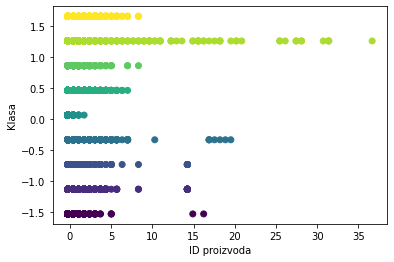

In [85]:
plt.scatter(products_train[:, 0], products_train[:, -1], c = products_train[:, -1])
plt.xlabel("ID proizvoda")
plt.ylabel("Klasa")
plt.show()

Odredimo maksimalnu i minimalnu vrijednost unutar pojedinog stupca (ne provjeravajući prvi i zadnji stupac)

In [4]:
min_array = np.min(products_train[:, 1:-2], axis = 1)
print("Minimum array: ", min_array)

max_array = np.max(products_train[:, 1:-2], axis = 1)
print("Maximum array: ", max_array)

Minimum array:  [0 0 0 ... 0 0 0]
Maximum array:  [5 12 11 ... 12 17 13]


Modificirajmo zadnji stupac podataka za treniranje i testiranje modela

In [5]:
le = LabelEncoder()

products_train[:, -1] = le.fit_transform(products_train[:, -1])
products_test[:, -1] = le.fit_transform(products_test[:, -1])

Labelizirali smo podatke iz oblika *Class_{0-8}* u oblik *0-8*

Obrisati ćemo prvi stupac iz skupa za treniranje i testiranje modela jer je ne potreban

In [6]:
products_train = np.delete(products_train, 0, 1)
products_test = np.delete(products_test, 0, 1)

print(products_train)

[[0 0 0 ... 0 0 7]
 [0 0 0 ... 0 0 1]
 [1 0 0 ... 0 0 1]
 ...
 [0 0 1 ... 0 1 3]
 [0 0 2 ... 4 0 5]
 [0 0 0 ... 0 0 5]]


Ostalo nam je 93 featura za treniranje modela te 94. stupac koji predstavlja klasu pojedinog proizvoda. Idući korak je skaliranje podataka.

In [7]:
ss = StandardScaler()

products_train[:, :-1] = ss.fit_transform(products_train[:, :-1])
products_test[:, :-1] = ss.fit_transform(products_test[:, :-1])

print(products_train)

[[-0.2535435774398227 -0.20810011457655495 -0.3081613261782769 ...
  -0.38584187238176976 -0.1068729636501006 7]
 [-0.2535435774398227 -0.20810011457655495 -0.3081613261782769 ...
  -0.38584187238176976 -0.1068729636501006 1]
 [0.40568867436062817 -0.20810011457655495 -0.3081613261782769 ...
  -0.38584187238176976 -0.1068729636501006 1]
 ...
 [-0.2535435774398227 -0.20810011457655495 0.03484897933743463 ...
  -0.38584187238176976 0.7657049199521122 3]
 [-0.2535435774398227 -0.20810011457655495 0.3778592848531461 ...
  3.700993897243491 -0.1068729636501006 5]
 [-0.2535435774398227 -0.20810011457655495 -0.3081613261782769 ...
  -0.38584187238176976 -0.1068729636501006 5]]


In [8]:
X_train = products_train[:, :-1].astype(np.double)
y_train = products_train[:, -1].astype(np.int)

X_test = products_test[:, :-1].astype(np.double)
y_test = products_test[:, -1].astype(np.int)

print(X_train)
print(y_train)

[[-0.25354358 -0.20810011 -0.30816133 ... -0.12978839 -0.38584187
  -0.10687296]
 [-0.25354358 -0.20810011 -0.30816133 ... -0.12978839 -0.38584187
  -0.10687296]
 [ 0.40568867 -0.20810011 -0.30816133 ... -0.12978839 -0.38584187
  -0.10687296]
 ...
 [-0.25354358 -0.20810011  0.03484898 ... -0.12978839 -0.38584187
   0.76570492]
 [-0.25354358 -0.20810011  0.37785928 ... -0.12978839  3.7009939
  -0.10687296]
 [-0.25354358 -0.20810011 -0.30816133 ... -0.12978839 -0.38584187
  -0.10687296]]
[7 1 1 ... 3 5 5]


#### Treniranje modela sa SGM (*Stohastička gradijentna metoda*)

In [34]:
sgd = SGDClassifier(loss = 'log', fit_intercept = True)
sgd.fit(X_train, y_train)

SGDClassifier(loss='log')

In [35]:
print("Modelu je trebalo {0} iteracija.".format(sgd.n_iter_))
print("Preciznost na skupu za:")
print(" * treniranje: {0}".format(sgd.score(X_train, y_train)))
print(" * testiranje: {0}".format(sgd.score(X_test, y_test)))

Modelu je trebalo 31 iteracija.
Preciznost na skupu za:
 * treniranje: 0.7497228039916225
 * testiranje: 0.7565703022339028


#### Treniranje modela sa regresijskim SGM (*Stohastička gradijentna metoda*)

In [135]:
rsgd = SGDRegressor(fit_intercept = True, loss = 'squared_loss')
rsgd.fit(X_train, y_train)

SGDRegressor()

In [136]:
print("Modelu je trebalo {0} iteracija.".format(rsgd.n_iter_))
print("Preciznost na skupu za:")
print(" * treniranje: {0}".format(rsgd.score(X_train, y_train)))
print(" * testiranje: {0}".format(rsgd.score(X_test, y_test)))

Modelu je trebalo 27 iteracija.
Preciznost na skupu za:
 * treniranje: 0.5194820196243526
 * testiranje: 0.5119456721176372


Nismo dobili bolji rezultat jer nam model nije *overfitan*

#### Treniranje modela preko Logističke regresije

In [79]:
lg = LogisticRegression(solver = 'newton-cg', fit_intercept = True, max_iter = 200, tol = 10**(-3), C = 20.0)
lg.fit(X_train, y_train)

LogisticRegression(C=20.0, max_iter=200, solver='newton-cg', tol=0.001)

In [80]:
print("Modelu je trebalo {0} iteracija.".format(lg.n_iter_))
print("Preciznost na skupu za:")
print(" * treniranje: {0}".format(lg.score(X_train, y_train)))
print(" * testiranje: {0}".format(lg.score(X_test, y_test)))

Modelu je trebalo [25] iteracija.
Preciznost na skupu za:
 * treniranje: 0.767175886000575
 * testiranje: 0.7651116951379764


#### Treniranje modela preko Logističke regresije CV (cross-validation estimator)

In [85]:
lgcv = LogisticRegressionCV(solver = 'lbfgs', fit_intercept = True, max_iter = 1000, cv = 5, random_state = 0)
lgcv.fit(X_train, y_train)

LogisticRegressionCV(cv=5, max_iter=1000, random_state=0)

In [87]:
print("Preciznost na skupu za:")
print(" * treniranje: {0}".format(lgcv.score(X_train, y_train)))
print(" * testiranje: {0}".format(lgcv.score(X_test, y_test)))

Preciznost na skupu za:
 * treniranje: 0.7670937538499446
 * testiranje: 0.7652759526938239


### Evauliranje modela

In [37]:
products_data_eval = pd.read_csv('./Podaci/Products/products_data_evaluate.csv')
products_data_eval.head()

,Unnamed: 0,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,36057,36058,0,0,12,5,0,0,0,0,...,0,0,0,0,0,2,0,0,1,1
1,59114,59115,5,0,1,1,0,0,0,0,...,0,0,2,0,0,2,0,1,5,0
2,42179,42180,0,1,0,0,0,0,0,1,...,0,0,0,0,0,3,0,0,0,0
3,8410,8411,1,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,0,0
4,52820,52821,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,1,0,0,0


In [39]:
X_eval = ss.fit_transform(products_data_eval.to_numpy()[:, 2:])

array([[-0.26636592, -0.25903012,  3.16473952, ..., -0.1555284 ,
         0.48186568,  0.97344296],
       [ 2.53159543, -0.25903012, -0.00518715, ...,  0.28381737,
         4.174323  , -0.14033617],
       [-0.26636592,  0.68633528, -0.2933623 , ..., -0.1555284 ,
        -0.44124865, -0.14033617],
       ...,
       [-0.26636592, -0.25903012, -0.2933623 , ..., -0.1555284 ,
        -0.44124865, -0.14033617],
       [-0.26636592, -0.25903012,  4.02926498, ..., -0.1555284 ,
        -0.44124865, -0.14033617],
       [-0.26636592, -0.25903012, -0.2933623 , ..., -0.1555284 ,
        -0.44124865, -0.14033617]])

 * SGM

In [46]:
sgd_pred = sgd.predict(X_eval).reshape(-1, 1)
print(sgd_pred)

[[5]
 [8]
 [6]
 [1]
 [7]
 [1]
 [5]
 [5]
 [5]
 [1]
 [5]
 [1]
 [1]
 [2]
 [1]
 [1]
 [5]
 [1]
 [5]
 [2]
 [5]
 [4]
 [4]
 [2]
 [8]
 [7]
 [2]
 [1]
 [5]
 [4]
 [1]
 [8]
 [1]
 [2]
 [2]
 [1]
 [2]
 [7]
 [1]
 [1]
 [8]
 [5]
 [5]
 [1]
 [5]
 [8]
 [7]
 [5]
 [8]
 [1]
 [7]
 [1]
 [1]
 [1]
 [7]
 [1]
 [2]
 [5]
 [1]
 [1]
 [5]
 [5]
 [3]
 [8]
 [6]
 [1]
 [1]
 [5]
 [7]
 [5]
 [2]
 [1]
 [1]
 [7]
 [5]
 [2]
 [7]
 [4]
 [8]
 [1]
 [1]
 [1]
 [8]
 [1]
 [5]
 [7]
 [1]
 [1]
 [1]
 [7]
 [6]
 [7]
 [8]
 [7]
 [5]
 [1]
 [1]
 [2]
 [2]
 [4]
 [7]
 [7]
 [6]
 [1]
 [5]
 [5]
 [1]
 [1]
 [1]
 [8]
 [1]
 [7]
 [1]
 [1]
 [6]
 [1]
 [1]
 [2]
 [8]
 [1]
 [7]
 [1]
 [1]
 [7]
 [1]
 [1]
 [5]
 [0]
 [5]
 [6]
 [8]
 [4]
 [1]
 [5]
 [1]
 [5]
 [2]
 [5]
 [1]
 [8]
 [2]
 [1]
 [1]
 [1]
 [8]
 [8]
 [6]
 [7]
 [2]
 [5]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [7]
 [5]
 [8]
 [8]
 [1]
 [5]
 [1]
 [1]
 [2]
 [1]
 [0]
 [8]
 [5]
 [5]
 [1]
 [7]
 [5]
 [1]
 [7]
 [5]
 [6]
 [1]
 [7]
 [5]
 [7]
 [7]
 [7]
 [7]
 [1]
 [1]
 [7]
 [1]
 [8]
 [5]
 [8]
 [5]
 [1]
 [4]
 [5]
 [1]
 [8]
 [7]
 [1]
 [1]


 * LG

In [89]:
lg_pred = lg.predict(X_eval).reshape(-1, 1)
print(lg_pred)

[[5]
 [8]
 [6]
 [1]
 [7]
 [1]
 [5]
 [5]
 [5]
 [1]
 [5]
 [1]
 [1]
 [2]
 [1]
 [1]
 [5]
 [1]
 [5]
 [2]
 [5]
 [4]
 [4]
 [2]
 [5]
 [8]
 [2]
 [1]
 [5]
 [4]
 [1]
 [8]
 [1]
 [2]
 [2]
 [1]
 [7]
 [7]
 [1]
 [1]
 [8]
 [5]
 [5]
 [1]
 [5]
 [8]
 [7]
 [5]
 [8]
 [1]
 [7]
 [1]
 [2]
 [1]
 [7]
 [1]
 [2]
 [5]
 [1]
 [1]
 [5]
 [5]
 [3]
 [0]
 [6]
 [1]
 [1]
 [5]
 [7]
 [5]
 [2]
 [1]
 [1]
 [7]
 [5]
 [2]
 [7]
 [4]
 [8]
 [1]
 [1]
 [1]
 [8]
 [1]
 [5]
 [7]
 [1]
 [1]
 [1]
 [7]
 [6]
 [7]
 [8]
 [7]
 [5]
 [1]
 [1]
 [1]
 [2]
 [4]
 [7]
 [7]
 [6]
 [1]
 [5]
 [5]
 [1]
 [1]
 [1]
 [8]
 [1]
 [7]
 [1]
 [3]
 [6]
 [1]
 [1]
 [2]
 [8]
 [1]
 [7]
 [1]
 [1]
 [7]
 [1]
 [1]
 [5]
 [8]
 [5]
 [6]
 [8]
 [4]
 [1]
 [5]
 [1]
 [6]
 [2]
 [5]
 [1]
 [8]
 [2]
 [1]
 [1]
 [1]
 [8]
 [0]
 [6]
 [7]
 [2]
 [5]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [7]
 [5]
 [8]
 [8]
 [1]
 [5]
 [1]
 [1]
 [2]
 [1]
 [0]
 [8]
 [5]
 [5]
 [1]
 [7]
 [5]
 [1]
 [7]
 [5]
 [6]
 [2]
 [7]
 [5]
 [6]
 [7]
 [7]
 [7]
 [1]
 [1]
 [7]
 [1]
 [8]
 [5]
 [8]
 [5]
 [1]
 [4]
 [5]
 [1]
 [8]
 [7]
 [1]
 [3]


 * LGCV

In [91]:
lgcv_pred = lgcv.predict(X_eval).reshape(-1, 1)
print(lgcv_pred)

[[5]
 [8]
 [6]
 [1]
 [7]
 [1]
 [5]
 [5]
 [5]
 [1]
 [5]
 [1]
 [1]
 [2]
 [1]
 [1]
 [5]
 [1]
 [5]
 [2]
 [5]
 [4]
 [4]
 [2]
 [5]
 [8]
 [2]
 [1]
 [5]
 [4]
 [1]
 [8]
 [1]
 [2]
 [2]
 [1]
 [7]
 [7]
 [1]
 [1]
 [8]
 [5]
 [5]
 [1]
 [5]
 [8]
 [7]
 [5]
 [8]
 [1]
 [7]
 [1]
 [2]
 [1]
 [7]
 [1]
 [2]
 [5]
 [1]
 [1]
 [5]
 [5]
 [3]
 [0]
 [6]
 [1]
 [1]
 [5]
 [7]
 [5]
 [2]
 [1]
 [1]
 [7]
 [5]
 [2]
 [7]
 [4]
 [8]
 [1]
 [1]
 [1]
 [8]
 [1]
 [5]
 [7]
 [1]
 [1]
 [1]
 [7]
 [6]
 [7]
 [8]
 [7]
 [5]
 [1]
 [1]
 [1]
 [2]
 [4]
 [7]
 [7]
 [6]
 [1]
 [5]
 [5]
 [1]
 [1]
 [1]
 [8]
 [1]
 [7]
 [1]
 [3]
 [6]
 [1]
 [1]
 [2]
 [8]
 [1]
 [7]
 [1]
 [1]
 [7]
 [1]
 [1]
 [5]
 [8]
 [5]
 [6]
 [8]
 [4]
 [1]
 [5]
 [1]
 [6]
 [2]
 [5]
 [1]
 [8]
 [2]
 [1]
 [1]
 [1]
 [8]
 [0]
 [6]
 [7]
 [2]
 [5]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [7]
 [5]
 [8]
 [8]
 [1]
 [5]
 [1]
 [1]
 [2]
 [1]
 [0]
 [8]
 [5]
 [5]
 [1]
 [7]
 [5]
 [1]
 [7]
 [5]
 [6]
 [2]
 [7]
 [5]
 [6]
 [7]
 [7]
 [7]
 [1]
 [1]
 [7]
 [1]
 [8]
 [5]
 [8]
 [5]
 [1]
 [4]
 [5]
 [1]
 [8]
 [7]
 [1]
 [3]


In [93]:
print("Broj ne podudaranja između: ")
print(" * Stohastički gradijent i logistička regresija: ", np.count_nonzero(sgd_pred != lg_pred))
print(" * Stohastički gradijent i logistička regresija CV (cross validation): ", np.count_nonzero(sgd_pred != lgcv_pred))
print(" * Logistička regresija i logistička regresija CV (cross validation): ", np.count_nonzero(lg_pred != lgcv_pred))

Broj ne podudaranja između: 
 * Stohastički gradijent i logistička regresija:  36
 * Stohastički gradijent i logistička regresija CV (cross validation):  38
 * Logistička regresija i logistička regresija CV (cross validation):  2


**Moj odabir**: logistička regresija sa među validatorom hiperparametara.

In [96]:
np.savetxt("products_data_evaluate_prediction.csv", lgcv_pred, delimiter=",")